In [1]:
#Load Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
import category_encoders as ce
from xgboost.sklearn import XGBRegressor
from sklearn import preprocessing
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils
#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import  scatter_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from multiprocessing import Pool
import sys
import time


In [2]:
dropped_columns = set()
targetVariable='fraudulent'
    
df=pd.read_csv('fake_job_postings.csv')
    
# number of rows and columns;
rows, columns = df.shape
print(f'Number of rows: {rows}\nNumber of columns: {columns}')

# Display Categorical Columns    
cv=df.dtypes.loc[df.dtypes=='object'].index
categorical = list(df.select_dtypes(include=['object']).columns.values)
# print (cv)
print(categorical)

Number of rows: 17880
Number of columns: 18
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [3]:
try:
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # To calculate mean use imputer class
    from sklearn.impute import SimpleImputer
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Train the imputer on the numeric columns of the df dataset and apply it to fill in missing values
    imputed_df = df.copy()
    imputed_df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

    # View the imputed data
    print(imputed_df)
    
except Exception as e:
    print("FillNAs")
    print(str(e))


        job_id                                              title  \
0          1.0                                   Marketing Intern   
1          2.0          Customer Service - Cloud Video Production   
2          3.0            Commissioning Machinery Assistant (CMA)   
3          4.0                  Account Executive - Washington DC   
4          5.0                                Bill Review Manager   
...        ...                                                ...   
17875  17876.0                   Account Director - Distribution    
17876  17877.0                                 Payroll Accountant   
17877  17878.0  Project Cost Control Staff Engineer - Cost Con...   
17878  17879.0                                   Graphic Designer   
17879  17880.0                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing          NaN   
1            NZ, , Auckland      Success          NaN   


In [4]:
try:
    print(df.shape)
    print(df.info())   
    print(df.groupby(targetVariable).size() )
    print(df.describe())
    
except Exception as e:
    print("Preprocess errors 2")
    print (str(e))

(17880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  obje

In [5]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

try:
    for cat in categorical:
        print(cat)
        df[cat] = le.fit_transform(df[cat].astype(str))
        
except Exception as e:
    print("errorEncoder")
    print (str(e))

title
location
department
salary_range
company_profile
description
requirements
benefits
employment_type
required_experience
required_education
industry
function


In [6]:
# def drop_constant_columns(dataframe):
    
#     result = dataframe.copy()
#     for column in dataframe.columns:
#         if len(dataframe[column].unique()) == 1:
#             result = result.drop(column,axis=1)
            
#     return result

# def drop_constant_column(dataframe):
#     try:
#         eps = 1e-6
#         C = dataframe.columns
#         print('Identifing low-variance columns...', end=' ')
        
#         for c in C:
#             print(dataframe[c])
#             temp = dataframe.loc[:, c]
#             variance=dataframe.loc[:, c].var()
#             print(variance)

#         if variance < eps:
#             # print('.. %-30s: too low variance ... column ignored'%(c))
#             dropped_columns.add(c)
#             dataframe.drop(c)
#             print('done!')
            
#     except Exception as e:
#         print("drop no variance")
#         print(str(e))

# # drop columns with low variance
# try:
#     print("variance1")
   
#     # column variance of the dataframe
#     print(df.var(axis=0))
#     print("variance2")
    
#     # row variance of the dataframe
#     print(df.var(axis=1))
    
#     # drop columns with no variance
#     df=drop_constant_column(df)
#     threshold = 0.2
#     df.drop(df.std()[df.std() < threshold].index.values, axis=1)
    
#     print("Number of columns after dropping low variance")
#     columns = df.shape[1];
#     print(df.shape[1])
    
# except Exception as e:
#     print("drop low variance")
#     print (str(e))

In [7]:
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if column == 'target':
            continue
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column, axis=1)
    return result

def drop_low_variance_columns(dataframe):
    try:
        eps = 1e-6
        dropped_columns = set()
        C = dataframe.columns
        print('Identifying low-variance columns...')
        for c in C:
            if c == 'target':
                continue
            variance = dataframe.loc[:, c].var()
            if variance < eps:
                dropped_columns.add(c)
                dataframe = dataframe.drop(c, axis=1)
        print(f'Dropped {len(dropped_columns)} low-variance columns:', dropped_columns)
        return dataframe
    except Exception as e:
        print("Error dropping low variance columns:", str(e))

# drop columns with low variance
try:
    # exclude target column from low variance check
    X = df.drop('target', axis=1)
    y = df['target']
    
    # column variance of the dataframe
    print("Column variance:", X.var(axis=0))
    
    # row variance of the dataframe
    print("Row variance:", X.var(axis=1))
    
    # drop columns with low variance
    X = drop_low_variance_columns(X)
    threshold = 0.2
    X = X.loc[:, X.std() >= threshold]
    
    # add target column back to dataframe
    X['target'] = y
    
    print("Number of columns after dropping low variance:", X.shape[1])
    
except Exception as e:
    print("Error dropping low variance columns:", str(e))


Error dropping low variance columns: "['target'] not found in axis"


In [8]:
missing_data=df.isnull()

# check infinite value
print("check infinite value, you should get false then true")
print("now all false")
print(np.isnan(df.any())) 


check infinite value, you should get false then true
now all false
job_id                 False
title                  False
location               False
department             False
salary_range           False
company_profile        False
description            False
requirements           False
benefits               False
telecommuting          False
has_company_logo       False
has_questions          False
employment_type        False
required_experience    False
required_education     False
industry               False
function               False
fraudulent             False
dtype: bool


In [9]:

print("now all true")
print(np.isfinite(df.all())) 
print("end check infinite values")

now all true
job_id                 True
title                  True
location               True
department             True
salary_range           True
company_profile        True
description            True
requirements           True
benefits               True
telecommuting          True
has_company_logo       True
has_questions          True
employment_type        True
required_experience    True
required_education     True
industry               True
function               True
fraudulent             True
dtype: bool
end check infinite values


In [10]:

print(missing_data.head(5))
print(missing_data.sum())
print(df.head(5))

   job_id  title  location  department  salary_range  company_profile  \
0   False  False     False       False         False            False   
1   False  False     False       False         False            False   
2   False  False     False       False         False            False   
3   False  False     False       False         False            False   
4   False  False     False       False         False            False   

   description  requirements  benefits  telecommuting  has_company_logo  \
0        False         False     False          False             False   
1        False         False     False          False             False   
2        False         False     False          False             False   
3        False         False     False          False             False   
4        False         False     False          False             False   

   has_questions  employment_type  required_experience  required_education  \
0          False            Fals

In [11]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from pandas.api.types import CategoricalDtype
from collections import defaultdict
from sklearn.model_selection import train_test_split

# clean the data set from nulls, nan, and infitinity values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

X=df
y = pd.DataFrame(data=X, columns=[targetVariable])

try:
    clean_dataset(df)
    
except Exception as e:
    print("error_preprocess_clean_dataset")
    print (str(e))
    
try:
    ce_ord = ce.OrdinalEncoder(cols=['title', 'location', 'department', 'salary_range',
        'company_profile', 'description', 'requirements', 'benefits',
        'employment_type', 'required_experience', 'required_education',
        'industry', 'function'])
    df = ce_ord.fit_transform(df)
    

    outdata=ce_ord.fit_transform(X,y)
    outdata1=outdata[['description','title', 'location']]
    outdata2 = outdata[['description', 'title']]
    outdata3 = outdata[['description']]
    
    # we use all columns except PolarityClass as features for training
    
    label = df[targetVariable]
    label1 = df[targetVariable]
    features = df.drop(targetVariable, 1)
    
    # the label is PolarityClass
    print(outdata)
    
except Exception as e:
    print("error_preprocess0")
    print (str(e))

       job_id  title  location  department  salary_range  company_profile  \
0           1      1         1           1             1                1   
1           2      2         2           2             1                2   
2           3      3         3           3             1                3   
3           4      4         4           4             1                4   
4           5      5         5           3             1                5   
...       ...    ...       ...         ...           ...              ...   
17875   17876  11230        28           4             1              648   
17876   17877   5411        61          79             1               57   
17877   17878  11231       133           3             1               18   
17878   17879    658      1921           3             1                6   
17879   17880   7598       511          17             1              648   

       description  requirements  benefits  telecommuting  has_company_logo

Correlation with target variable:
fraudulent             1.000000
job_id                 0.079872
location               0.079086
salary_range           0.057828
title                  0.052733
department             0.035257
telecommuting          0.034523
required_education     0.034296
description            0.032437
benefits               0.027201
industry               0.017471
requirements           0.014056
function               0.003221
employment_type        0.002962
required_experience   -0.009326
company_profile       -0.065694
has_questions         -0.091627
has_company_logo      -0.261971
Name: fraudulent, dtype: float64


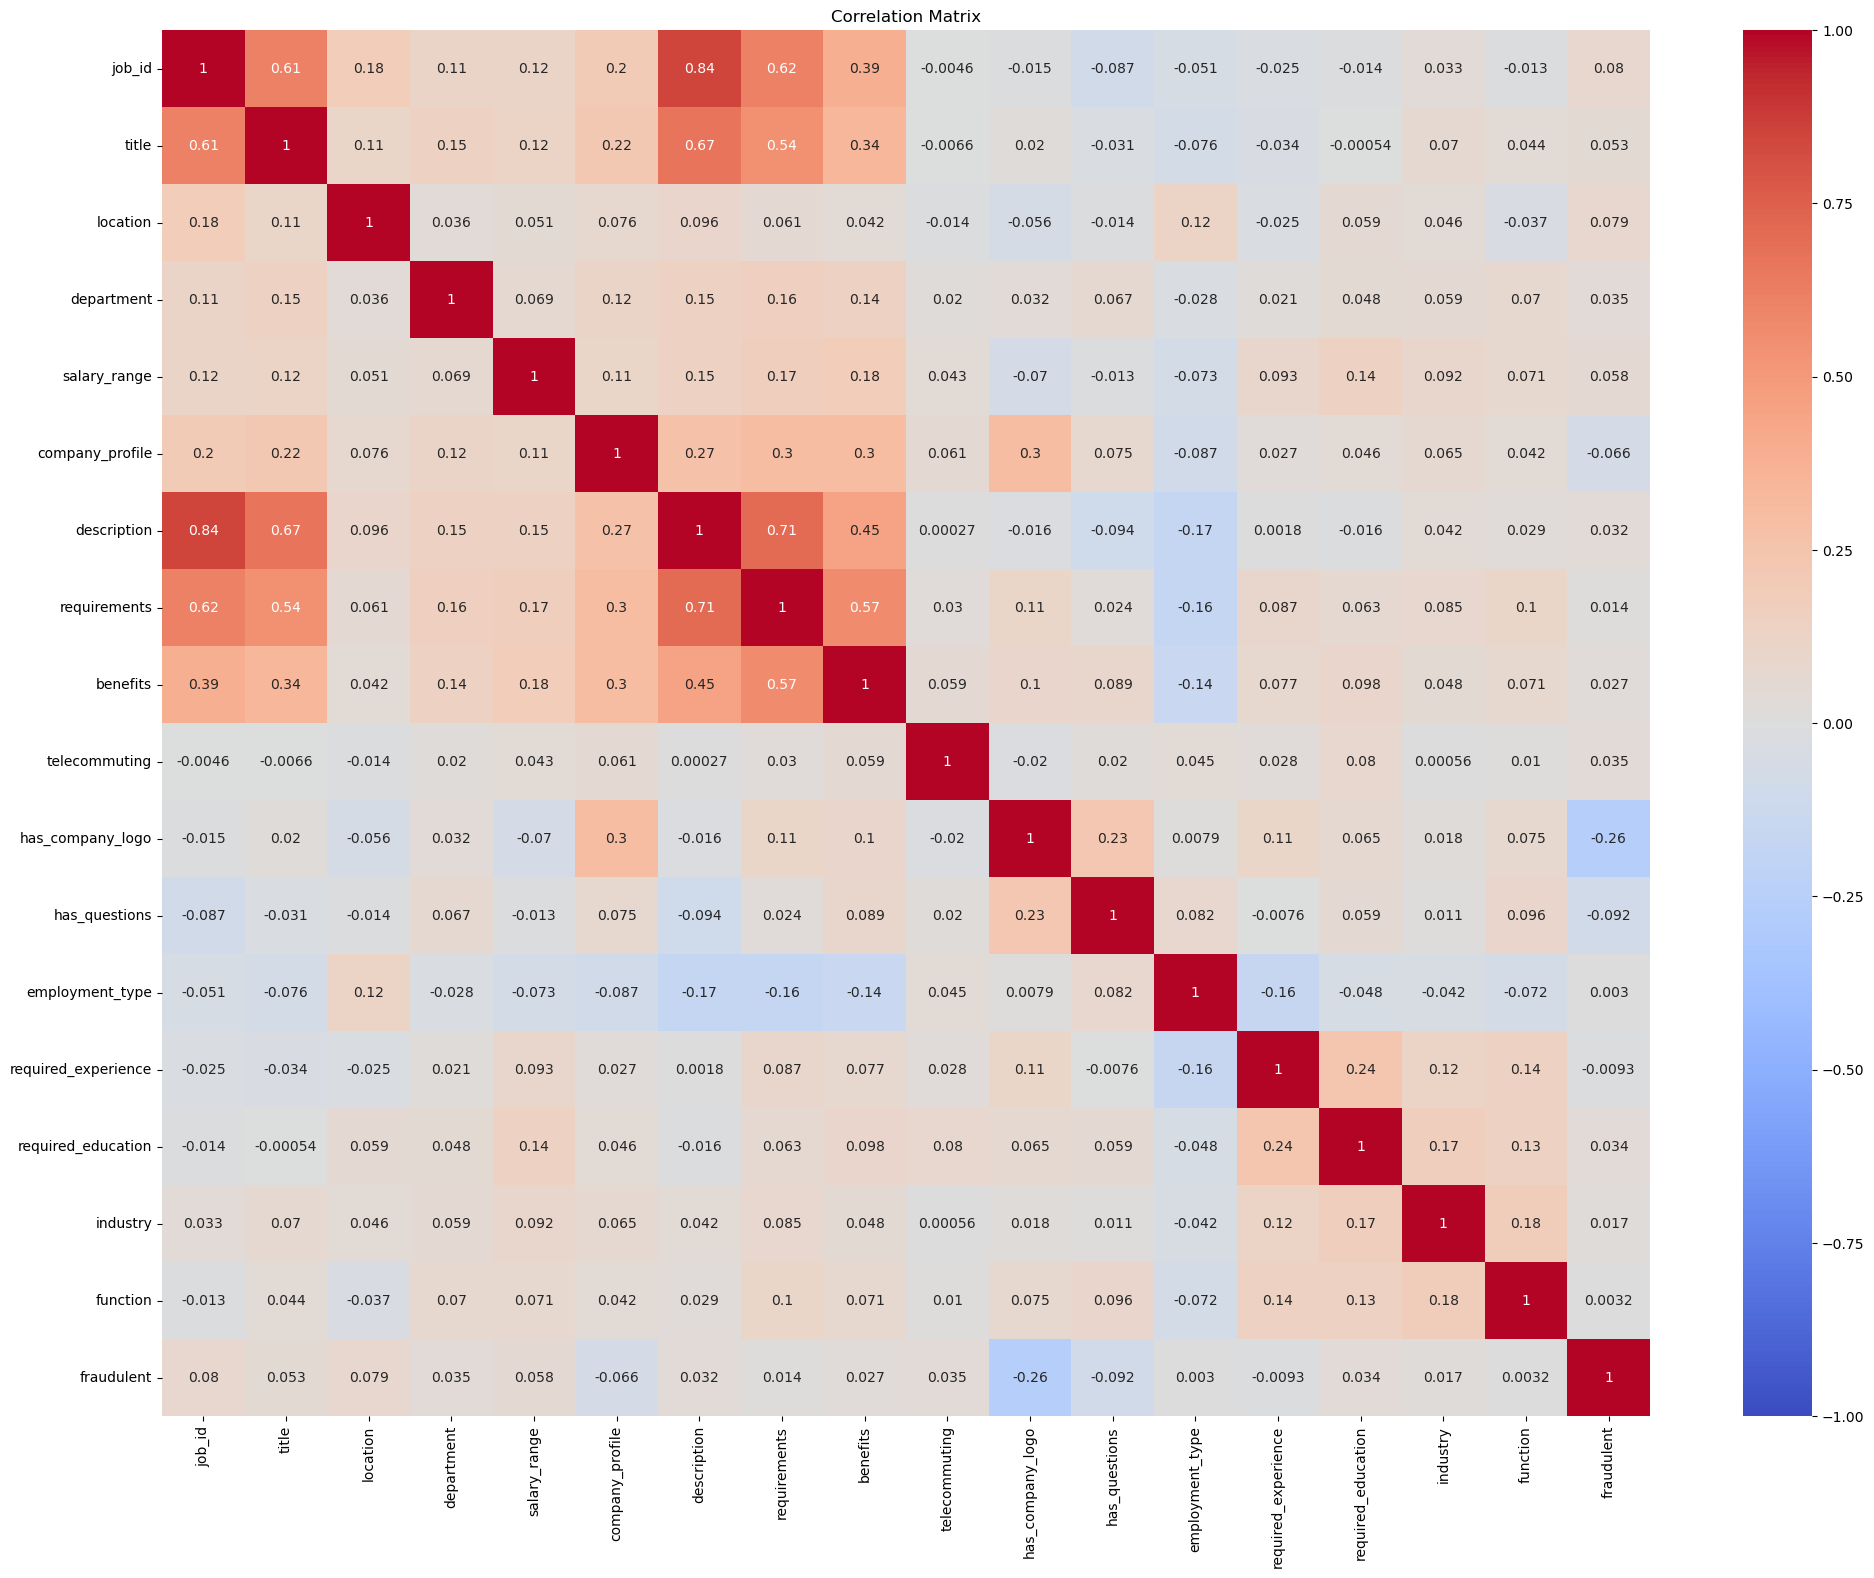

In [12]:
# Correlation Between Attributes

try:
    corr_matrix = df.corr()
    
    # Check correlation with target variable
    target_corr = corr_matrix[targetVariable].sort_values(ascending=False)
    print("Correlation with target variable:")
    print(target_corr)
    
    # Visualize correlation matrix
    plt.figure(figsize=(24, 18))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1.0, cmap="coolwarm", annot=True)
    plt.title("Correlation Matrix")
    plt.savefig('correlation_matrix_plot.png')
    plt.show()
    
except Exception as e:
    print("Error during preprocessing:")
    print(str(e))


job_id                 0.000000
title                  0.420581
location               1.534692
department             3.092460
salary_range           4.003857
company_profile        1.445976
description            0.101635
requirements           0.346380
benefits               1.053981
telecommuting          4.512188
has_company_logo      -1.463895
has_questions          0.033117
employment_type        1.634571
required_experience    0.616228
required_education     2.093005
industry               2.053254
function               2.011098
fraudulent             4.207199
dtype: float64


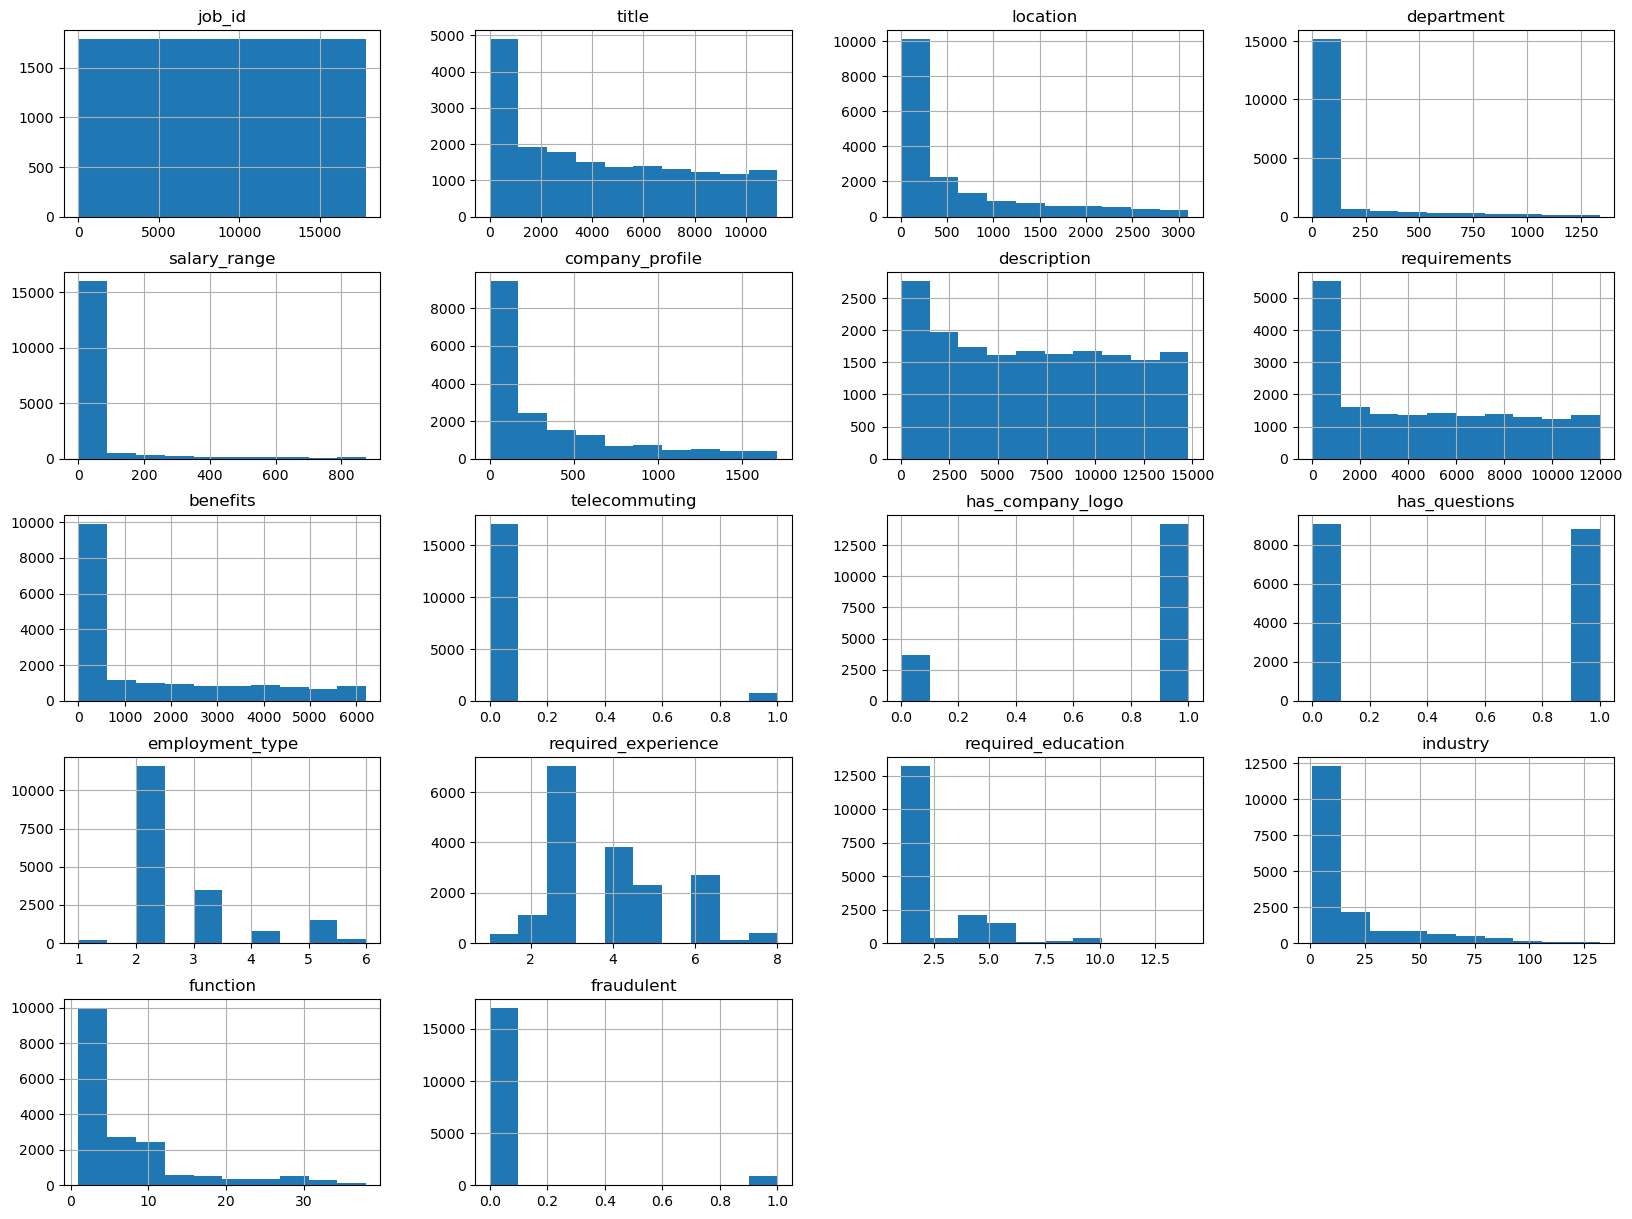

In [13]:
#Skew of Univariate Distributions
#The skew result can show us a positive(right) or negative (left) skew. Values closer to zero show less skew
try:
    print(df.skew())
    #It is better to use some data visualization to get a better idea.
    from matplotlib import pyplot as plt
    df.hist(bins=10, figsize=(20,15))
    plt.savefig('Univariate_Distributions.png')
    plt.show()
    
except Exception as e:
    print("errorUnivariate")
    print (str(e))

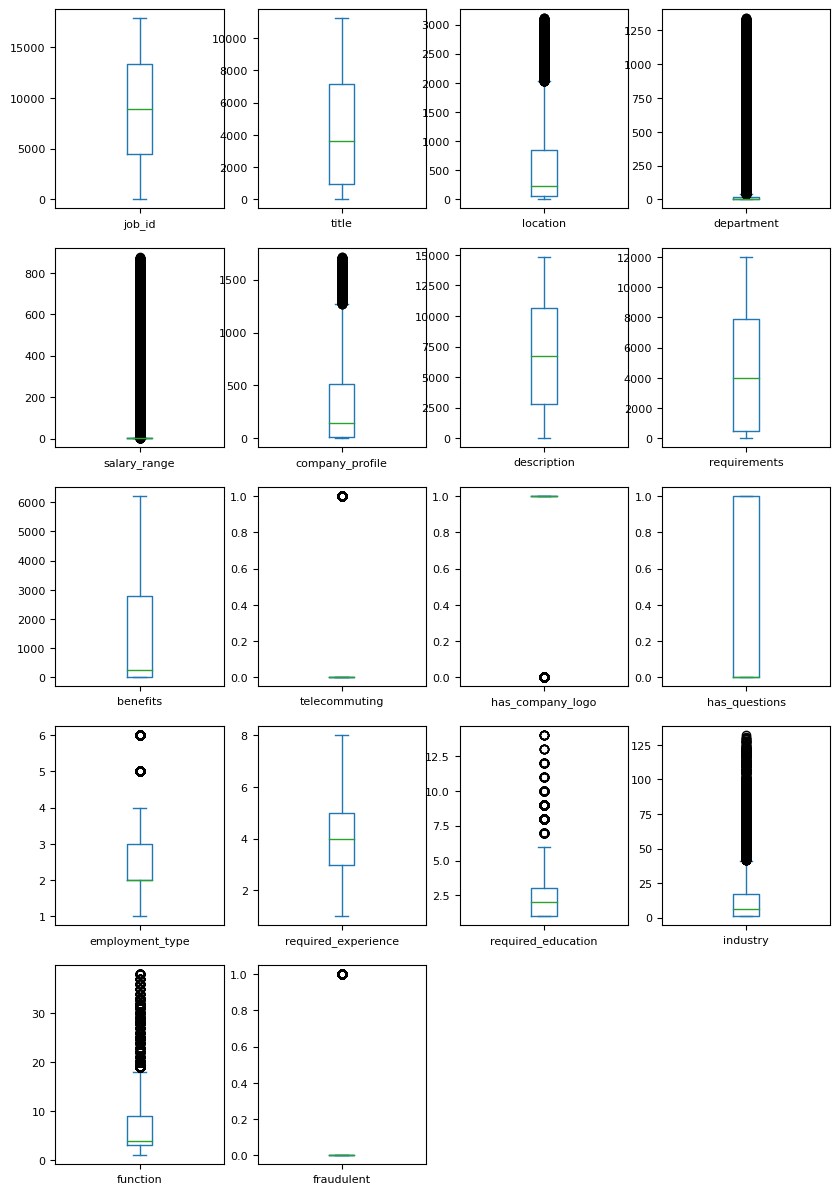

In [14]:
df.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, fontsize=8, figsize=(10,15))

try:
    plt.savefig('boxplot.png')
    plt.show()
except Exception as e:
    print("errorUnivariate")
    print (str(e))

In [15]:
# Evaluation for Missing Data

try:
    # Check for missing data
    missing_data = df.isnull()
    print("Number of missing values per column:")
    print(missing_data.sum())
    
    # Check distribution of missing values per column
    for column in missing_data.columns.values.tolist():
        print("Column: " + column)
        print(missing_data[column].value_counts())
        print("--------------------------------")
    
    # Calculate percentage of missing data
    percent_missing = round((missing_data.sum() / len(missing_data)) * 100, 4)
    print("Percentage of missing data per column:")
    print(percent_missing)
    
    # Check for outliers
    quantile_threshold = 0.99
    quantile = df.quantile(quantile_threshold)
    print("Outliers (values higher than " + str(quantile_threshold) + " quantile):")
    print(df[df > quantile])
    
    # Check data types
    print("Data types per column:")
    print(df.dtypes)
    
except Exception as e:
    print("Error during missing data evaluation:")
    print(str(e))

Number of missing values per column:
job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64
Column: job_id
False    17880
Name: job_id, dtype: int64
--------------------------------
Column: title
False    17880
Name: title, dtype: int64
--------------------------------
Column: location
False    17880
Name: location, dtype: int64
--------------------------------
Column: department
False    17880
Name: department, dtype: int64
--------------------------------
Column: salary_range
False    17880
Name: salary_range, dtype: int64
--------------------------------
Column: company_profile
Fals

Type of target variable: binary
Encoded target variable: [0 0 0 ... 0 0 0]

Top 10 features selected using SelectKBest with chi2 as a score function:
             Features          Score
0             job_id  339900.504083
1              title  140210.670310
2           location  113677.837500
6        description   55098.088234
5    company_profile   42633.833129
8           benefits   33258.180335
4       salary_range   25818.132917
3         department   13759.119116
7       requirements   11843.015263
10  has_company_logo     251.182084


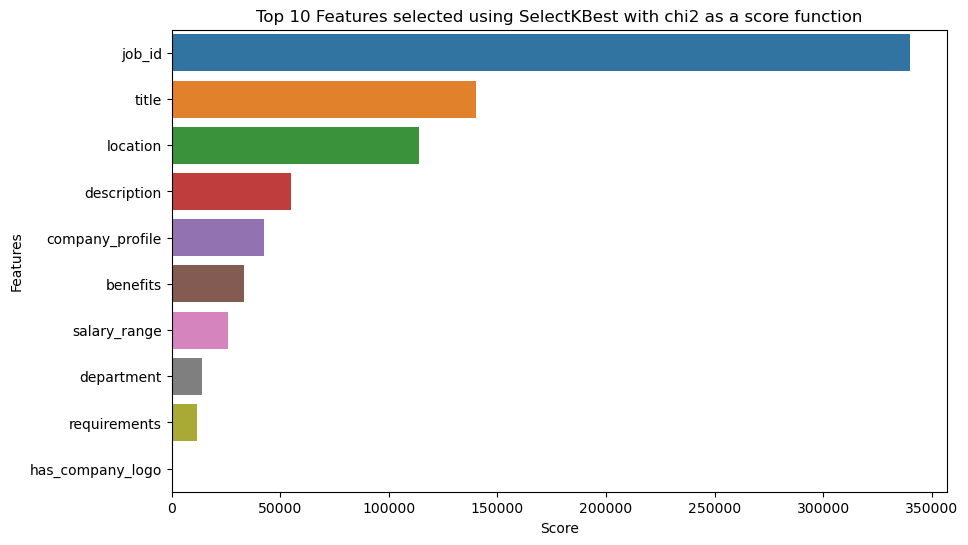

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils

try:
    # Separate the target variable and features
    X = df.drop(targetVariable, axis=1)
    y = df[targetVariable]

    # Encode the target variable
    lab_enc = preprocessing.LabelEncoder()
    training_scores_encoded = lab_enc.fit_transform(y)

    # Print the type of target variable and encoded variable
    print("Type of target variable:", utils.multiclass.type_of_target(y))
    print("Encoded target variable:", training_scores_encoded)

    # 1- Univariate Selection
    # Apply SelectKBest to extract the top 10 best features
    best_features = SelectKBest(score_func=chi2, k='all')
    fit = best_features.fit(X, training_scores_encoded)

    # Create a dataframe with feature scores and columns
    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(X.columns)
    feature_scores = pd.concat([df_columns, df_scores], axis=1)
    feature_scores.columns = ['Features', 'Score']

    # Print the top 10 features
    print("\nTop 10 features selected using SelectKBest with chi2 as a score function:\n", feature_scores.nlargest(10, 'Score'))

    # Visualize the top 10 features using a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Score', y='Features', data=feature_scores.nlargest(10, 'Score'))
    plt.title('Top 10 Features selected using SelectKBest with chi2 as a score function')
    plt.show()

except Exception as e:
    print("Error in Feature Selection:")
    print(str(e))


Feature importances:
[0.13986941 0.07880531 0.07602244 0.04946887 0.03093414 0.05746775
 0.10116725 0.07285435 0.05286911 0.01043749 0.07287379 0.02044
 0.03781035 0.04393466 0.0470766  0.06191134 0.04605716]


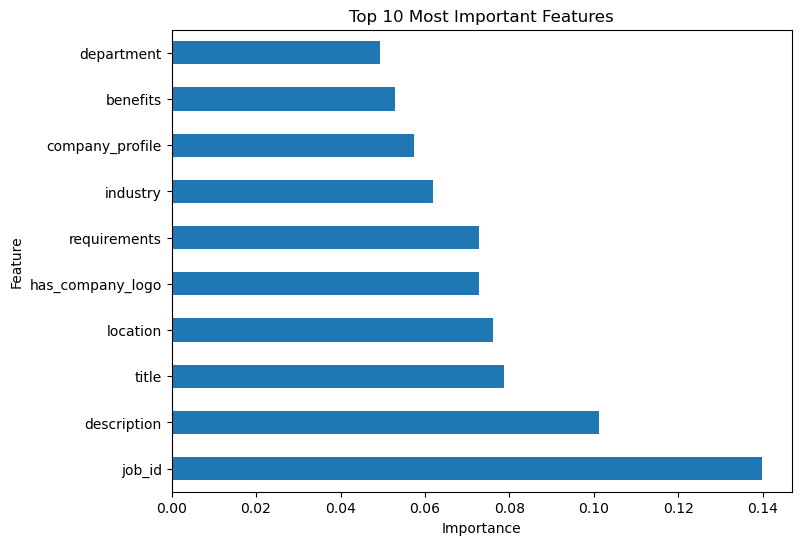

In [17]:
# Feature Importance
try:
    # Train an ExtraTreesClassifier model
    model = ExtraTreesClassifier()
    model.fit(X, training_scores_encoded)
    
    # Print feature importances
    print("Feature importances:")
    print(model.feature_importances_)
    
    # Plot graph of feature importances
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_n = 10  # Number of top features to show
    top_feat_importances = feat_importances.nlargest(top_n)
    plt.figure(figsize=(8, 6))
    top_feat_importances.plot(kind='barh')
    plt.title("Top {} Most Important Features".format(top_n))
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.savefig('most_important_features.png')
    plt.show()
    
except Exception as e:
    print("Error during feature importance analysis:")
    print(str(e))


In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def classifiers(info):
    classifier_names = info[0]
    X = info[1]
    training_scores_encoded = info[2]
    df = info[3]
    targetVariable = info[4]
    
    results = pd.DataFrame(columns=["Classifier", "Accuracy"])
    
    for classifier_name in classifier_names:
        print("------------------------------------------------------------------")
        print(f"Calculating the accuracy of {classifier_name}...")
        
        if classifier_name == "LinR":
            clf_name = "Linear Regression"
            try:
                scaler = MinMaxScaler(feature_range=(0, 1))
                rescaledX = scaler.fit_transform(X)
                
                # Linear Regression
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                lin_reg= LinearRegression()
                results_linreg= cross_val_score(lin_reg, rescaledX, training_scores_encoded, cv=kfold)
                print('Estimated Accuracy of Linear Regression: {:.2%}'.format(results_linreg.mean()))
                accuracy = results_linreg.mean()
                
            except Exception as e:
                print("Error Linear Regression")
                print (str(e))

        if classifier_name == "LogR":
            clf_name = "Logistic Regression"
            try:
                # Logistic Regression
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
                results_logreg = cross_val_score(logreg, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated Accuracy of Logistic Regression: {:.2%}'.format(results_logreg.mean()))
                accuracy = results_logreg.mean()
                
            except Exception as e:
                print("Error Logistic Regression")
                print (str(e))
                
        if classifier_name == "KNN":
            clf_name = "k-Nearest Neighbors"
            try:
                # K-Nearest Neighbors
                kfold = KFold(n_splits=10, shuffle=True, random_state=42)
                knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
                results_knn = cross_val_score(knn, X, training_scores_encoded, cv=kfold, n_jobs=-1)
                print('Estimated Accuracy of K-Nearest Neighbors: {:.2%}'.format(results_knn.mean()))
                accuracy = results_knn.mean()

            except Exception as e:
                print("Error K-Nearest Neighbors")
                print(str(e))
                
        if classifier_name == "GNB":
            clf_name = "Gaussian Naive Bayes"
            try:
                # Gaussian Naive Bayes
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                gaussian = GaussianNB()
                results_gaussian = cross_val_score(gaussian, X, training_scores_encoded, cv=kfold)
                print('Estimated Accuracy of Gaussian Naive Bayes: {:.2%}'.format(results_gaussian.mean()))
                accuracy = results_gaussian.mean()

            except Exception as e:
                print("Error in Gaussian Naive Bayes")
                print(str(e))
        
        if classifier_name == "Per":
            clf_name = "Perceptron"
            try:
                # Perceptron
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                per = Perceptron(max_iter=1000, tol=1e-3)
                results_per = cross_val_score(per, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Perceptron: {:.2%}'.format(results_per.mean()))
                accuracy = results_per.mean()

            except Exception as e:
                print("Error in Perceptron")
                print(str(e))

        if classifier_name == "LinSVC":
            clf_name = "Linear SVC"
            try:
                # Linear SVC
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                svc = LinearSVC(max_iter=1000)
                results_svc = cross_val_score(svc, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Linear SVC: {:.2%}'.format(results_svc.mean()))
                accuracy = results_svc.mean()

            except Exception as e:
                print("Error in Linear SVC")
                print(str(e))
                
        if classifier_name == "SGD":
            clf_name="Stochastic Gradient Descent"
            try:
                # Stochastic Gradient Descent
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                sgd = SGDClassifier(max_iter=1000, tol=1e-3)
                results_sgd = cross_val_score(sgd, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Stochastic Gradient Descent: {:.2%}'.format(results_sgd.mean()))
                accuracy = results_sgd.mean()

            except Exception as e:
                print("Error in Stochastic Gradient Descent")
                print(str(e))

        if classifier_name == "DT":
            clf_name="Decision Tree"
            try:
                # Decision Tree
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                dt = DecisionTreeClassifier()
                results_dt = cross_val_score(dt, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Decision Tree: {:.2%}'.format(results_dt.mean()))
                accuracy = results_dt.mean()

            except Exception as e:
                print("Error in Decision Tree")
                print(str(e))

        if classifier_name == "RF":
            clf_name = "Random Forest"
            try:
                # Random Forest
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                rf = RandomForestClassifier(n_estimators=100)
                results_rf = cross_val_score(rf, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Random Forest: {:.2%}'.format(results_rf.mean()))
                accuracy = results_rf.mean()

            except Exception as e:
                print("Error in Random Forest")
                print(str(e))
                
        if classifier_name == "LDA":
            clf_name="Linear Discriminant Analysis"
            try:
                # Linear Discriminant Analysis
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                lda = LinearDiscriminantAnalysis()
                results_lda = cross_val_score(lda, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimated accuracy Linear Discriminant Analysis: {:.2%}'.format(results_lda.mean()))
                accuracy = results_lda.mean()

            except Exception as e:
                print("Error in Linear Discriminant Analysis")
                print(str(e))

        if classifier_name == "Ada_Ensemble":
            clf_name = "Ada Boost - Ensemble"
            try:
                # Ada Boost Classifier
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                AB = AdaBoostClassifier()
                results_AB = cross_val_score(AB, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Ada Boost Classifier: {:.2%}'.format(results_AB.mean()))
                accuracy = results_AB.mean()

            except Exception as e:
                print("error  Ada Boost Classifier")
                print (str(e))
        
        if classifier_name == "GradBoost_Ensemble":
            clf_name = "Gradient Boosting"
            try:
                #AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)

                # Gradient Boosting Classifier
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                GBC = GradientBoostingClassifier()
                results_GBC = cross_val_score(GBC, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Gradient Boosting Classifier: {:.2%}'.format(results_GBC.mean()))
                accuracy = results_GBC.mean()

            except Exception as e:
                print("error Gradient Boosting Classifier")
                print (str(e))

        if classifier_name == "ETC":
            clf_name = "ExtraTrees"
            try:
                #ExtraTreesClassifier
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                ETC=ExtraTreesClassifier(n_estimators=100)
                results_ETC = cross_val_score(ETC, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy ExtraTreesClassifier: {:.2%}'.format(results_ETC.mean()))
                accuracy = results_ETC.mean()

            except Exception as e:
                print("error ExtraTreesClassifier")
                print (str(e))
        
        if classifier_name == "XGB":
            clf_name = "Extreme Gradient Boosting"
            
            #XGBClassifier(objective
            xgbs = XGBClassifier(objective="binary:logistic", random_state=42)
            results_xgbs = cross_val_score(xgbs, X, training_scores_encoded, cv=kfold, scoring='accuracy')
            print('Estimate accuracy XGBClassifier: {:.2%}'.format(results_xgbs.mean()))
            accuracy = results_xgbs.mean()
    
        results = results.append({"Classifier": clf_name, "Accuracy": accuracy}, ignore_index=True)
        results = results.sort_values(by=['Accuracy'], ascending=False)

    return results
                
        

CLASSIFIERS = [ "LinR", "LogR", "KNN", "GNB", "Per", "LinSVC", "SGD", "DT", "RF", "LDA", "Ada_Ensemble", "GradBoost_Ensemble", "ETC", "XGB" ]

if (sys.platform == "win32"): # Windows
    print("Classifier accuracy being obtained with single thread")
    results = classifiers([CLASSIFIERS, X, training_scores_encoded, df, targetVariable])
    print("\n \n")
    print("=====================================================================================")
    print(results)
    print("=====================================================================================")
    
else:
    print("Classifier accuracy being obtained with multiple threads")
    fourDataSets = [[CLASSIFIERS[0:3] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[4:7] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[8:11] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[12:13] ,X, training_scores_encoded, df, targetVariable]] 

    pool = Pool(processes=4)
    pool.map(classifiers, fourDataSets)
    results = pd.concat(pool.map(classifiers, fourDataSets))
    print(results)
                       
                       

Classifier accuracy being obtained with single thread
------------------------------------------------------------------
Calculating the accuracy of LinR...
Estimated Accuracy of Linear Regression: 8.72%
------------------------------------------------------------------
Calculating the accuracy of LogR...
Estimated Accuracy of Logistic Regression: 95.16%
------------------------------------------------------------------
Calculating the accuracy of KNN...
Estimated Accuracy of K-Nearest Neighbors: 95.92%
------------------------------------------------------------------
Calculating the accuracy of GNB...
Estimated Accuracy of Gaussian Naive Bayes: 91.75%
------------------------------------------------------------------
Calculating the accuracy of Per...
Estimated accuracy Perceptron: 94.35%
------------------------------------------------------------------
Calculating the accuracy of LinSVC...
Estimated accuracy Linear SVC: 85.63%
-------------------------------------------------------

In [26]:
try:
    scaler = MinMaxScaler(feature_range=(0, 1))
    rescaledX = scaler.fit_transform(X)
    
    # Feature Selection
    select = SelectKBest(k=10)
    selected_features = select.fit_transform(rescaledX, training_scores_encoded)
    
    # Hyperparameter Tuning
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    lin_reg = LinearRegression()
    param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False]}
    grid_search = GridSearchCV(lin_reg, param_grid, cv=kfold, n_jobs=-1, verbose=1)
    grid_search.fit(selected_features, training_scores_encoded)
    
    # Print Results
    print('Best parameters for Linear Regression: ', grid_search.best_params_)
    print('Estimated Accuracy of Linear Regression: {:.2%}'.format(grid_search.best_score_))
    
except Exception as e:
    print("Error Linear Regression")
    print(str(e))


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best parameters for Linear Regression:  {'copy_X': True, 'fit_intercept': True}
Estimated Accuracy of Linear Regression: 8.02%
